# 1 Введение

## 1.1 Постановка задачи

**Заказчик** -- российская авиакомпания, выполняющая внутренние пассажирские перевозки  
  
**Задача** -- изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали

## 1.2 Исходные данные

### 1.2.1 Переданные файлы
- query_1.csv;
- query_3.csv;
- query_last.csv

### 1.2.2 Описание данных

#### 1.2.2.1 Набор данных *query_1*
- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года
  
#### 1.2.2.2 Набор данных *query_3*
- *city* — города;
- *average_flights* — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года
  
#### 1.2.2.3 Набор данных *query_last*
- *week_number* — номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week* — есть ли на этой неделе фестиваль;
- *festival_name* — название фестиваля.

## 1.3 План обработки и анализа данных

### 1.3.1 Предобработка данных
- обзор данных;
- корректировка имён столбцов (при необходимости);
- обнаружение и удаление пропусков:
 - выявить пропуски;
 - проанализировать причины их появления;
 - заполнить пропуски (приняв решение по алгоритму заполнения), либо удалить их;
- преобразование типов данных столбцов (при необходимости);
- поиск и исправление ошибок (аномальных значений) в данных;
- удаление дубликатов строк.

### 1.3.2 Анализ данных
#### 1.3.3.1 Набор *query_1*
#### 1.3.3.2 Набор *query_3*

### 1.3.3 Проверка гипотез
Необходимо проверить, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.
  
Для этого необходимо:
- сформулировать нулевые и альтернативные гипотезы;
- выбрать и обосновать значение *alpha* ($\alpha$);
- выбрать и обосновать критерий проверки гипотез;
- провести проверку гипотез.

### 1.3.4 Вывод

## 1.4 Пользовательские функции

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.core.display import HTML

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 10
#pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None

# 2 Основная часть

## 2.1 Предобработка данных

<a id='2_1_1'></a>
### 2.1.1 Набор *query_1*

**Обзор данных**

In [3]:
query_1 = pd.read_csv('query_1.csv')

In [4]:
query_1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Набор данных предобработки не требует

### 2.1.2 Набор *query_3*

**Обзор данных**

In [5]:
query_3 = pd.read_csv('query_3.csv')

In [6]:
query_3.head(10)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_3.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


Набор данных предобработки не требует

### 2.1.3 Таблица *query_last*

**Обзор данных**

In [9]:
query_last = pd.read_csv('query_last.csv')

In [10]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.00,Park Live
1,31,51034,31.00,Пикник Афиши
2,32,51675,nan,NaN
3,33,51378,nan,NaN
4,34,51492,nan,NaN
5,35,51360,nan,NaN
6,36,51386,36.00,Видфест
7,37,51670,nan,NaN
8,38,51518,nan,NaN
9,39,51623,nan,NaN


In [11]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [12]:
query_last.describe()

,week_number,ticket_amount,festival_week
count,10.00,10.00,3.00
mean,34.50,50670.40,32.33
std,3.03,2502.75,3.21
min,30.00,43568.00,30.00
25%,32.25,51364.50,30.50
50%,34.50,51439.00,31.00
75%,36.75,51596.75,33.50
max,39.00,51675.00,36.00


По итогам первого, общего взгляда на данные, можно сделать вывод, что имеются пропуски в столбцах *festival_week* и *festival_name*, тип данных столбца *festival_week* необходимо преобразовать в *int*. Пропуски в столбце *festival_week* заменим на нулевые значения, в столбце *festival_name* -- на "-".

In [13]:
query_last['festival_week'].fillna(0, inplace=True)

In [14]:
query_last['festival_week'] = query_last['festival_week'].astype(int)

In [15]:
query_last['festival_name'].fillna('-', inplace=True)

In [16]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,-
3,33,51378,0,-
4,34,51492,0,-
5,35,51360,0,-
6,36,51386,36,Видфест
7,37,51670,0,-
8,38,51518,0,-
9,39,51623,0,-


***Промежуточный итог***  
  
В ходе предобработки данных были удалены пропуски в столбцах *festival_week* и *festival_name*, тип столбца *festival_week* был преобразован в *int*.
  
Аномальные значения в таблице *query_last* отсутствуют.

## 2.2 Анализ данных

### 2.2.1 Набор *query_1*

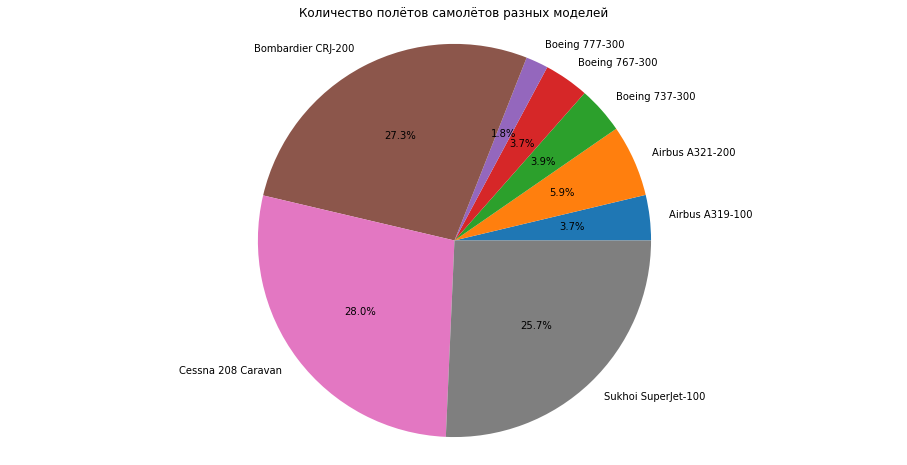

In [17]:
_, ax = plt.subplots(figsize=(16,8))
_ = ax.pie(query_1['flights_amount'].tolist(), labels=query_1['model'].tolist(), autopct='%1.1f%%')
ax.axis('equal')
_ = ax.set_title('Количество полётов самолётов разных моделей')

In [18]:
query_1.sort_values(by='flights_amount', ascending = False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


***Промежуточный итог***  
  
По итогам анализа набора данных можно сделать вывод, что основной объём пассажироперевозок приходится на самолёты с вместимостью до 100 человек. Данные самолёты используются на ближнемагистральных маршрутах, что говорит о том, что основной объём пассажиров в сентябре 2018 года пользовался перелётами внутри страны, что не удивительно, ведь Заказчик -- авиакомпания, выполняющая внутренние пассажирские перевозки

### 2.2.2 Набор *query_3*

In [19]:
top_10 = query_3.sort_values(by='average_flights', ascending = False).head(10)
top_10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


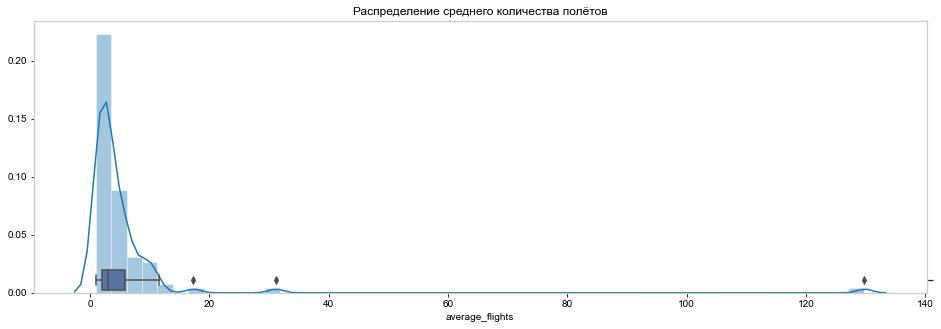

In [20]:
_, ax = plt.subplots(figsize=(16,5))
sns.set(style="whitegrid")
sns.distplot(query_3['average_flights'], ax=ax)
ax.set_title('Распределение среднего количества полётов')
ax2 = ax.twinx()
sns.boxplot(x=query_3['average_flights'], ax=ax2)
_ = ax2.set(ylim=(-.5, 10))

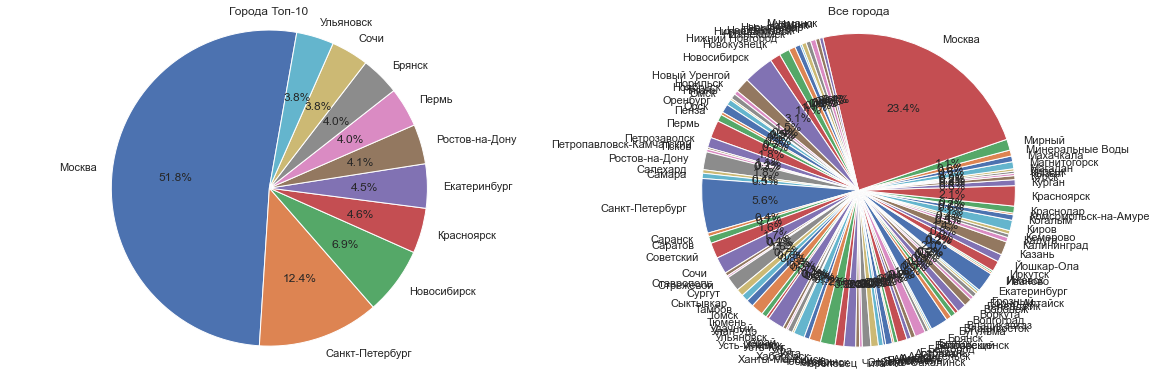

In [21]:
_, axs = plt.subplots(1, 2, figsize=(16,5), constrained_layout=True)
axs[0].pie(top_10['average_flights'].tolist(), labels=top_10['city'].tolist(), autopct='%1.1f%%', startangle=80)
axs[0].axis('equal')
axs[0].set_title('Города Топ-10')
axs[1].pie(query_3['average_flights'].tolist(), labels=query_3['city'].tolist(), autopct='%1.1f%%', startangle=280)
axs[1].axis('equal')
_ = axs[1].set_title('Все города')

***Промежуточный итог***  
  
По итогам анализа набора данных можно сделать вывод, что среднее количество перелётов в городах, имеющих аэропорт, меньше десяти, а основное количество перелётов приходится на Москву, С.Петербург и Новосибирск

## 2.3 Проверка гипотез

Необходимо проверить, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

In [22]:
not_festival_weeks = query_last.query('festival_week == 0')
festival_weeks = query_last.query('festival_week != 0')

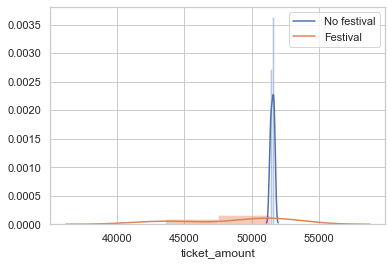

In [23]:
 _, ax = plt.subplots()
sns.set(style="whitegrid")
sns.distplot(not_festival_weeks['ticket_amount'], ax=ax, kde_kws={"label": "No festival"})
_ = sns.distplot(festival_weeks['ticket_amount'], ax=ax, kde_kws={"label": "Festival"})

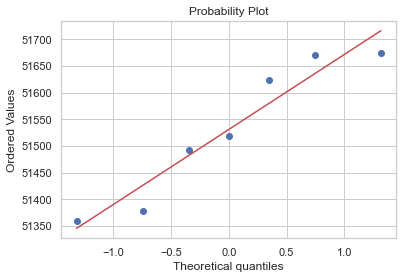

In [24]:
ax = st.probplot(not_festival_weeks['ticket_amount'], plot=plt)

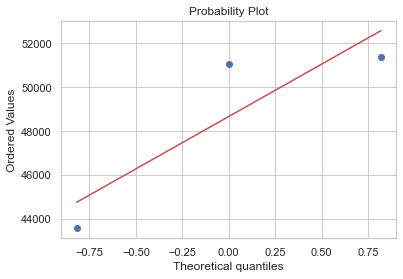

In [25]:
ax = st.probplot(festival_weeks['ticket_amount'], plot=plt)

Анализируя графики, можно предположить, что средние значения выборок *not_festival_weeks* и *festival_weeks* находятся в доверительных интервалах друг друга, т.е. можно утверждать, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Однако, проверим данное утверждение.  
  
Данную проверку можно осуществить проверив **нулевую гипотезу**:  
  
$$
H_0: \mu_1 = \mu_2,
$$
  
Тогда **альтернативная гипотеза** примет вид:  

$$
H_1: \mu_1 \neq \mu_2,
$$

где:  
$\mu_1$ - среднее значение спроса на билеты (среднее количество проданных билетов) во время фестивалей,  
$\mu_2$ - среднее значение спроса на билеты (среднее количество проданных билетов) в обычное время.  
  
Для проверки нулевых гипотез необходимо посчитать ***р-уровень*** значимости для статистического различия средних двух генеральных совокупностей по имеющимся у нас выборкам. Применять к выборкам кртиерий Стьюдента нельзя, поскольку наборы данных имеют менее 30 элементов и, к тому же, раcпределены не по нормальному закону (это видно из QQ-диаграмм выборок). В данном случае необходимо применять U-критерий Манна—Уитни. Значимым ***р-уровнем*** ($\alpha$) по-прежнему можно считать величину 0.05 (5%)

In [26]:
alpha = 0.05

results = st.mannwhitneyu(not_festival_weeks['ticket_amount'], festival_weeks['ticket_amount'], alternative='two-sided')

print('p-значение: ', results.pvalue)

p-значение:  0.06824748837800128


***Промежуточный итог***  
  
Расчитанные значения ***р-уровня*** значимости показывают, что нулевая гипотеза $H_0$ может быть отвергнута.  

Иными словами, средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время -- вероятнее всего спрос выше.

# 3 Вывод

В ходе выполнения работы было сделано следующее.  
  
На этапе предобрадотки данных наборы *query_1* и *query_3* предобработки не потребовали. В наборе данных *query_last* были удалены пропуски в столбцах *festival_week* и *festival_name*, тип столбца *festival_week* был преобразован в *int*.
  
Затем на этапе анализа данных был сделаны следующие выводы:
- основной объём пассажироперевозок приходится на самолёты вместимостью до 100 человек; данные самолёты используются на ближнемагистральных маршрутах, что говорит о том, что основной объём пассажиров в сентябре 2018 года пользовался перелётами внутри страны, что не удивительно, ведь Заказчик -- авиакомпания, выполняющая внутренние пассажирские перевозки;
- среднее количество перелётов в городах, имеющих аэропорт, меньше десяти, а основное количество перелётов приходится на Москву, С.Петербург и Новосибирск.
  
Затем была проверна гипотеза о том, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Данная проверка была осуществлена проверкой **нулевой гипотезы**:  
  
$$
H_0: \mu_1 = \mu_2,
$$
  
При этом **альтернативная гипотеза** приняла вид:  

$$
H_1: \mu_1 \neq \mu_2,
$$

где:  
$\mu_1$ - среднее значение спроса на билеты (среднее количество проданных билетов) во время фестивалей,  
$\mu_2$ - среднее значение спроса на билеты (среднее количество проданных билетов) в обычное время.  
  
Применять к выборкам кртиерий Стьюдента нельзя, поскольку наборы данных имеют менее 30 элементов и, к тому же, раcпределены не по нормальному закону (это видно из QQ-диаграмм выборок). В данном случае необходимо применять U-критерий Манна—Уитни. Значимым ***р-уровнем*** ($\alpha$) по-прежнему можно считать величину 0.05 (5%)</font>

По итогам рассчёта значения ***р-уровня*** был сделан вывод, что нулевая гипотеза $H_0$ может быть отвергнута.  

***Таким образом, средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время -- вероятнее всего спрос выше.***